In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import sys
import astropy.units as u
import secpy

#from secpy.universe import *
#import seaborn as sns
from secpy.utils import *


#from fisher import *
from secpy.profiles import*

import secpy.universe as su

from secpy.halo import HaloModel
from scipy.interpolate import interp1d
from scipy.integrate import simps

import matplotlib as pl
pl.rcParams['figure.figsize'] = 8,8
pl.rcParams['ytick.minor.visible'] =True
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['font.size'] = '22'
pl.rcParams['legend.fontsize'] = '16'
pl.rcParams['legend.borderaxespad'] = 1.0
#pl.rcParams['legend.numpoints'] = '1'



In [2]:
import pickle

with open('../../data/pSZ_Connor_tau_galaxy.pkl','rb') as fp:
    quadPowers = pickle.load(fp, encoding='latin1')
    
central_redshifts = quadPowers['redshifts']
n_redshifts = len(central_redshifts)

def sigma_z(z):
    
    return 0.03 * (1. + z)

buffer = 0.
redshift_bins = np.array([[z - 2*sigma_z(z),z + 2*sigma_z(z) - buffer] for z in central_redshifts])

In [3]:
# Initialize cosmology and mass function
cosmo = su.Cosmo()
mf = MassFunction(cosmo)
h=0.7
mmin=1e12
mmax=1e16


#*~*~ THE SPLINE IS CALLED AT THESE REDSHIFTS...
zmin = redshift_bins[0][0]
zmax = redshift_bins[0][1]

lmin=2
lmax=4500
lnum=20

ell_array = np.logspace(np.log10(lmin),np.log10(lmax),num=lnum)
hm = HaloModel(cosmo, mf, lrange=ell_array, npts=50, Mmin=mmin, Mmax=mmax, zmin=zmin, zmax=zmax)

c:\pSZ\psz\env\lib\site-packages\secpy\mass_func.py:191: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  norm = integrate.quad(lambda x: self.f_nu_unnorm(x,z)*self.bias_nu(x),


Mmin= 1000000000000.0
Mmax= 1e+16


In [4]:
# Initialize galaxy window function

#*~*~ BUT THESE REDSHIFTS DEFINE THE SPLINE
# z = np.linspace(0,5,num=1000)
z = np.linspace(redshift_bins[0][0],redshift_bins[0][1],10)
nbar=get_nbar(z)

In [5]:
z, zmax

(array([0.        , 0.0141844 , 0.02836879, 0.04255319, 0.05673759,
        0.07092199, 0.08510638, 0.09929078, 0.11347518, 0.12765957]),
 0.1276495744680851)

In [10]:
1.27666254e-01 # SO WHY IS THIS ZMAX ???

0.127666254

In [6]:
# Get the density profile and tau profile
et = ClusterElectronTau(cosmo) #Tau 
dens = ClusterDensity(cosmo, hmf=mf,  zgal=z, ngal=nbar) #galaxy overdensity profile

In [7]:
dens.dn_dz_spline(0), dens.dn_dz_spline(0.12765957)

(array(0.), array(2984.01377097))

In [8]:
dens.u_ell_1h

<bound method ClusterDensity.u_ell_1h of <secpy.profiles.ClusterDensity object at 0x0000024209B666D0>>

In [9]:
# Calculate the poewer spectra of galaxy over density field
clgg1h=hm.GetCl1Halo(dens.u_ell_1h)
clgg2h=hm.GetCl2Halo(dens.u_ell_2h)
clgg=clgg1h+ clgg2h

[2.25815433e-09 2.52760633e-03 5.05820595e-03 7.59181583e-03
 1.01284512e-02 1.26681273e-02 1.52108594e-02 1.77566629e-02
 2.03055532e-02 2.28575459e-02 2.54126564e-02 2.79709004e-02
 3.05322935e-02 3.30968514e-02 3.56645899e-02 3.82355248e-02
 4.08096721e-02 4.33870476e-02 4.59676675e-02 4.85515477e-02
 5.11387044e-02 5.37291537e-02 5.63229120e-02 5.89199956e-02
 6.15204208e-02 6.41242040e-02 6.67313618e-02 6.93419107e-02
 7.19558673e-02 7.45732484e-02 7.71940706e-02 7.98183507e-02
 8.24461058e-02 8.50773526e-02 8.77121082e-02 9.03503896e-02
 9.29922140e-02 9.56375986e-02 9.82865606e-02 1.00939117e-01
 1.03595286e-01 1.06255085e-01 1.08918530e-01 1.11585640e-01
 1.14256433e-01 1.16930926e-01 1.19609136e-01 1.22291082e-01
 1.24976782e-01 1.27666254e-01]
[2.25815433e-09 2.52760633e-03 5.05820595e-03 7.59181583e-03
 1.01284512e-02 1.26681273e-02 1.52108594e-02 1.77566629e-02
 2.03055532e-02 2.28575459e-02 2.54126564e-02 2.79709004e-02
 3.05322935e-02 3.30968514e-02 3.56645899e-02 3.82355

ValueError: A value in x_new is above the interpolation range.

In [7]:
# Calculate the poewer spectra of tau-g cross correlation
cltg1h=hm.GetCl1Halo(et.tau_ell, k2=dens.u_ell_1h)
cltg2h=hm.GetCl2Halo(et.tau_ell, k2=dens.u_ell_2h)
cltg=cltg1h+ cltg2h

In [9]:
# Calculate the poewer spectra of tau field
cltt1h=hm.GetCl1Halo(et.tau_ell)
cltt2h=hm.GetCl2Halo(et.tau_ell)
cltt=cltt1h+ cltt2h

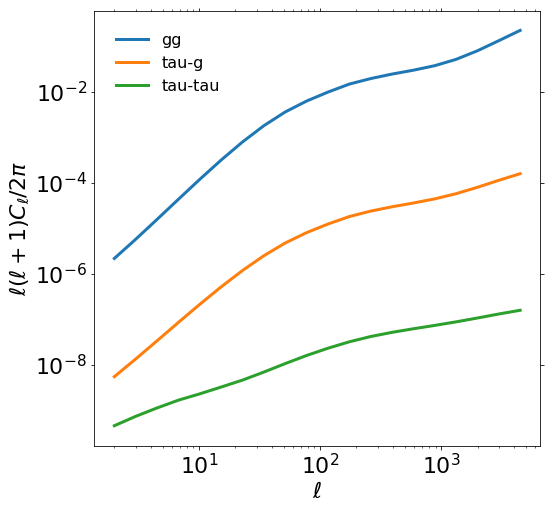

In [10]:
# Plot the tau-g and g-g power spectra
fac= ell_array* (ell_array+ 1)/ 2.0/np.pi
plt.loglog(ell_array,  fac* (clgg1h+clgg2h), lw=3,  label="gg")
plt.loglog(ell_array,  fac* (cltg1h+cltg2h), lw=3, label="tau-g")
plt.loglog(ell_array,  fac* (cltt1h+cltt2h), lw=3, label="tau-tau")
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell + 1) C_\ell /2\pi$")
plt.legend(loc=0, frameon=False)

In [3]:
galaxy_shot_noise(0.1,0.2)

2.795693470145162e-05